# 라이브러리 불러오기

In [35]:
import os
import face_recognition

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

from PIL import Image

Step1. 사진 모으기
비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

1. 내 사진 찍기

내 사진을 2장 이상 포함합시다.
내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

2. 비교할 연예인 사진 모으기

많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

file_list: ['clinton.jpeg', 'trump.jpg', 'bush.jpeg', 'biden.jpg', 'reagan.jpg', 'obama.jpg']


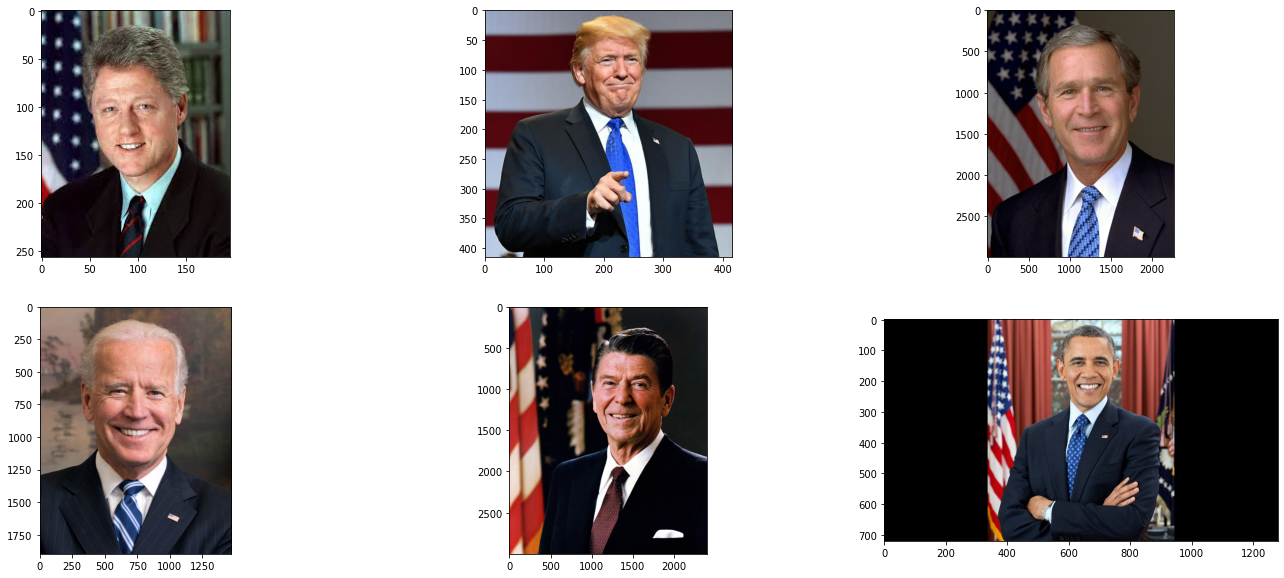

In [5]:
# 파일 경로 설정
dir_path = os.getenv('HOME') + '/aiffel/face_embedding/imagesforEP'
file_list = os.listdir(dir_path)

print('file_list: {}'.format(file_list))

# Set figsize
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (24, 10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path + '/' + file_list[i])
    ax.imshow(image)
    
plt.show()

fig.tight_layout()

Step2. 얼굴 영역 자르기
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

```
#    힌트
#    from PIL import Image
#    face = get_cropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

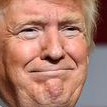

In [6]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face


image_path = dir_path + '/' + file_list[1]
# image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
#pillow_image.save(path_to_save)
pillow_image



Step3. 얼굴 영역의 임베딩 추출하기
이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

`def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수   
`def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [7]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
         0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
         0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
         0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
        -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
        -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
         0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
         0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
        -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
        -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
        -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
        -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
         0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
         0.05921567, -0.06115703, -0.11171092,  0.2

In [32]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

In [36]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']


array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 ```get_nearest_face(name, top=5)``` 함수들을 응용하면 손쉽게 수행 가능합니다.

In [78]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117374787042

In [79]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   

In [81]:
def get_nearest_face(name, top = 5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key = lambda x : sort_key_func(x[0]))
    
    for i in range(top + 1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 ({}), 이름 ({}), 거리 ({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

Step5. 다양한 재미있는 시각화 시도해 보기
비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎

In [82]:
get_nearest_face('obama')

순위 (1), 이름 (biden), 거리 (0.846720652777963)
순위 (2), 이름 (bush), 거리 (0.8639189288560225)
순위 (3), 이름 (reagan), 거리 (0.8692435806803928)
순위 (4), 이름 (trump), 거리 (0.8885117374787042)
순위 (5), 이름 (clinton), 거리 (0.9000994624487408)
